# Computational Finance
## Series 11
Tientso Ning

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as optimize
import matplotlib.pyplot as plt

In [2]:
#bond with 3 years maturity, face value of 100$, and coupon of 0.10 paid semi-annually

def YTM(price, par, T, coup, freq, step):
    periods = T*freq
    coupon = coup/100.*par/freq
    dt = [(i+1)/freq for i in range(int(periods))]
    ytm_ = lambda y: sum([coupon/(1+y/freq)**(freq*t) for t in dt]) + par/(1+y/freq)**(freq*T) - price
    
    return optimize.newton(ytm_, step)

print("Required yield to sell at par (100$): ", YTM(100, 100, 3, 10, 2, 0.05)*100, "%")

Required yield to sell at par (100$):  9.999999999999737 %


In [3]:
principal = [100,100,100,100,100]
maturity = [1/12,2/12,3/12,6/12,12/12]
coupon = [0,0,0,6,8]
price = [99.80,99.60,99.4,100.27,101.57]

data = pd.DataFrame({"principal":principal, "maturity":maturity, "coupon":coupon, "price":price})
data

,principal,maturity,coupon,price
0,100,0.083333,0,99.80
1,100,0.166667,0,99.60
2,100,0.250000,0,99.40
3,100,0.500000,6,100.27
4,100,1.000000,8,101.57


In [4]:
def spot_rate(par, price, maturity):
    total_interest = par/price
    spot = ((1/maturity)*np.log(total_interest))
    total_interest = total_interest-1
    return spot, total_interest

In [5]:
data['spot_rate'] = data.apply(lambda x : spot_rate(x['principal'],x['price'],x['maturity'])[0], axis=1)

In [6]:
data['freq'] = [2,2,2,2,2]
data

,principal,maturity,coupon,price,spot_rate,freq
0,100,0.083333,0,99.80,0.024024,2
1,100,0.166667,0,99.60,0.024048,2
2,100,0.250000,0,99.40,0.024072,2
3,100,0.500000,6,100.27,-0.005393,2
4,100,1.000000,8,101.57,-0.015578,2


But we have to take into account coupon payments

In [7]:
def coupon_payment(coupon, freq, periods, data):
    coupon_amount = coupon/freq
    coupon_pay = 0
    
    for i in range(1, periods):
        period = (i/freq)
        period_spot = data.loc[data['maturity'] == period, 'spot_rate'].values
        discounted_value = coupon_amount / np.exp(period_spot*period)
        try:
            coupon_pay += discounted_value[0]
        except:
            coupon_pay += 0
    
    return coupon_pay

In [8]:
def spot_rate(par, price, maturity, coupon, freq, data):
    coupon_pay = 0
    
    if coupon != 0:
        periods = np.int(maturity*freq)
        coupon_pay = coupon_payment(coupon, freq, periods, data)
    
    final_flow = par + coupon/freq if maturity%(1/freq) == 0 else par
    
    final_price = price - coupon_pay
    
    total_interest = final_flow/final_price
    
    spot = ((1/maturity)*np.log(total_interest))
    
    total_interest = total_interest-1
    
    return spot, total_interest

In [9]:
for k, v in data.iterrows():
    data.set_value(k, 'spot_rate', spot_rate(v['principal'],v['price'],v['maturity'],v['coupon'],v['freq'], data)[0])

/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Text(0.5, 1.0, 'Zero Curve')

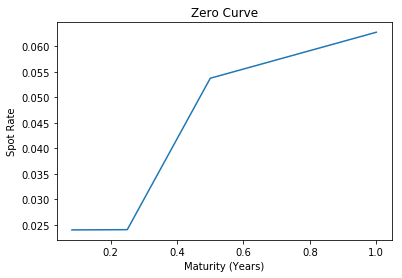

In [10]:
plt.plot(data['maturity'],data['spot_rate'])
plt.xlabel("Maturity (Years)")
plt.ylabel("Spot Rate")
plt.title("Zero Curve")

In [11]:
principal = [100,100,100,100,100,100]
maturity = [2,3,4,5,7,10]
coupon = [4,4,4,4,0,0]
price = [103.21,104.85,106.36,107.77,84.48,77.72]

data = pd.DataFrame({"principal":principal, "maturity":maturity, "coupon":coupon, "price":price})
data

,principal,maturity,coupon,price
0,100,2,4,103.21
1,100,3,4,104.85
2,100,4,4,106.36
3,100,5,4,107.77
4,100,7,0,84.48
5,100,10,0,77.72


In [12]:
def spot_rate(par, price, maturity):
    total_interest = par/price
    spot = ((1/maturity)*np.log(total_interest))
    total_interest = total_interest-1
    return spot, total_interest

In [13]:
data['spot_rate'] = data.apply(lambda x : spot_rate(x['principal'],x['price'],x['maturity'])[0], axis=1)

In [14]:
data['freq'] = [1,1,1,1,1,1]
data

,principal,maturity,coupon,price,spot_rate,freq
0,100,2,4,103.21,-0.015798,1
1,100,3,4,104.85,-0.015787,1
2,100,4,4,106.36,-0.015415,1
3,100,5,4,107.77,-0.014966,1
4,100,7,0,84.48,0.024094,1
5,100,10,0,77.72,0.025206,1


But we have to take into account coupon payments

In [15]:
def coupon_payment(coupon, freq, periods, data):
    coupon_amount = coupon/freq
    coupon_pay = 0
    
    for i in range(1, periods):
        period = (i/freq)
        period_spot = data.loc[data['maturity'] == period, 'spot_rate'].values
        discounted_value = coupon_amount / np.exp(period_spot*period)
        try:
            coupon_pay += discounted_value[0]
        except:
            coupon_pay += 0
    
    return coupon_pay

In [16]:
def spot_rate(par, price, maturity, coupon, freq, data):
    coupon_pay = 0
    
    if coupon != 0:
        periods = np.int(maturity*freq)
        coupon_pay = coupon_payment(coupon, freq, periods, data)
    
    final_flow = par + coupon/freq if maturity%(1/freq) == 0 else par
    
    final_price = price - coupon_pay
    
    total_interest = final_flow/final_price
    
    spot = ((1/maturity)*np.log(total_interest))
    
    total_interest = total_interest-1
    
    return spot, total_interest

In [17]:
for k, v in data.iterrows():
    data.set_value(k, 'spot_rate', spot_rate(v['principal'],v['price'],v['maturity'],v['coupon'],v['freq'], data)[0])

/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Text(0.5, 1.0, 'Zero Curve')

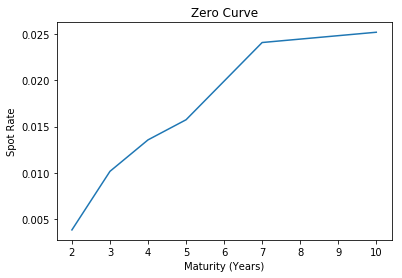

In [18]:
plt.plot(data['maturity'],data['spot_rate'])
plt.xlabel("Maturity (Years)")
plt.ylabel("Spot Rate")
plt.title("Zero Curve")

The graphs show the zero coupon rate of the bonds as a function of maturity (in years). As we can see, it is an increase, meaning that the bonds with higher maturity time has a higher spot rate, which as per the price and coupon payments data given, makes sense because the bonds without coupon payments' yield is based on its maturity payment. Thus We can see that the bonds with zero coupon payments tend to have a lower price, since investors would not stand to be making money from coupons holding the bonds. Thus the zero coupon interest rate acts as a sort of comparison factor so investors can determine whether or not these bonds without coupons are worth their investment at the current price compared to other bonds, or even other investments.